In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import numpy as np

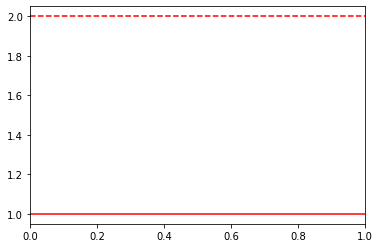

In [13]:
plt.axhline(y=1, color='r', linestyle='-', label='Max value')
plt.axhline(y=2, color='r', linestyle='--', label='Max value')


In [5]:
a = np.array([])
type(a)

numpy.ndarray

In [9]:
ea = EA(args)

ea_fit = []
for gen in range(1000):
    ea.step()
    f = np.mean([true_eval(i) for i in ea])
    ea_fit.append(f)
    if not gen % 10:
        print(f"{gen} -> {f}", end="\r")
    
ea

<ipython-input-4-50f1d1a35028>:37: RuntimeWarning: divide by zero encountered in double_scalars
  np.log(1.25 * n * (t ** 4) / d) / (2.0 * u)


EA: 18006
 - Ind (10) | 1.2e+01 / 2
 - Ind (10) | 1.1e+01 / 380
 - Ind (10) | 1.1e+01 / 21
 - Ind (10) | 1.1e+01 / 6
 - Ind (10) | 1.1e+01 / 55
 - Ind (10) | 1.1e+01 / 2
 - Ind (10) | 1e+01 / 3
 - Ind (10) | 1e+01 / 4
 - Ind (10) | 9.1 / 2
 - Ind (10) | 8.9 / 2
 - Ind (10) | 8.8 / 2
 - Ind (10) | 8.1 / 2

In [33]:
ucea = UCEA(args)

ucea_fit = []
for gen in range(1000):
    ucea.step()
    f = np.mean([true_eval(i) for i in ucea])
    ucea_fit.append(f)
    if not gen % 10:
        print(f"{gen} -> {f}", end="\r")
    
ucea

<ipython-input-4-50f1d1a35028>:37: RuntimeWarning: divide by zero encountered in double_scalars
  np.log(1.25 * n * (t ** 4) / d) / (2.0 * u)


UCEA: 94204
 - Ind (10) | 1.2e+01 / 235
 - Ind (10) | 1.2e+01 / 507
 - Ind (10) | 1.2e+01 / 597
 - Ind (10) | 1.2e+01 / 510
 - Ind (10) | 1.1e+01 / 1141
 - Ind (10) | 1.1e+01 / 998
 - Ind (10) | 1.1e+01 / 31
 - Ind (10) | 1e+01 / 10
 - Ind (10) | 9.1 / 4
 - Ind (10) | 8.8 / 2
 - Ind (10) | 8.3 / 2
 - Ind (10) | 7.2 / 1

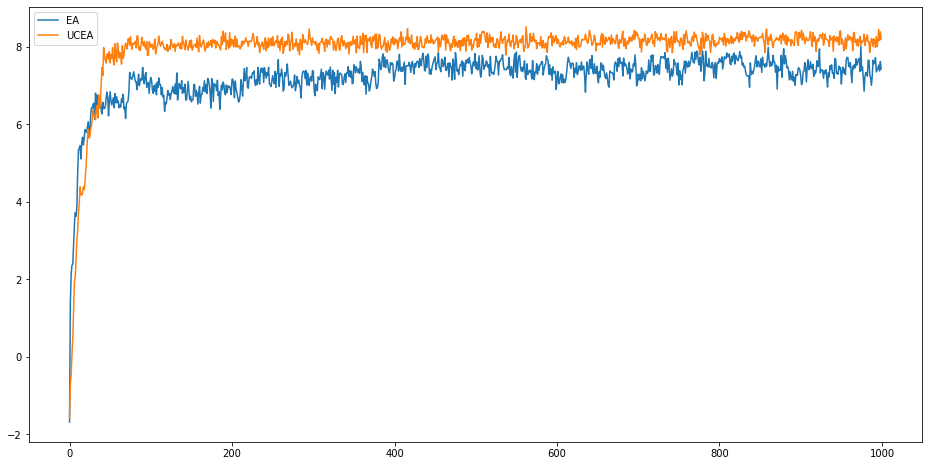

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(ea_fit, label="EA")
plt.plot(ucea_fit, label="UCEA")
plt.legend()

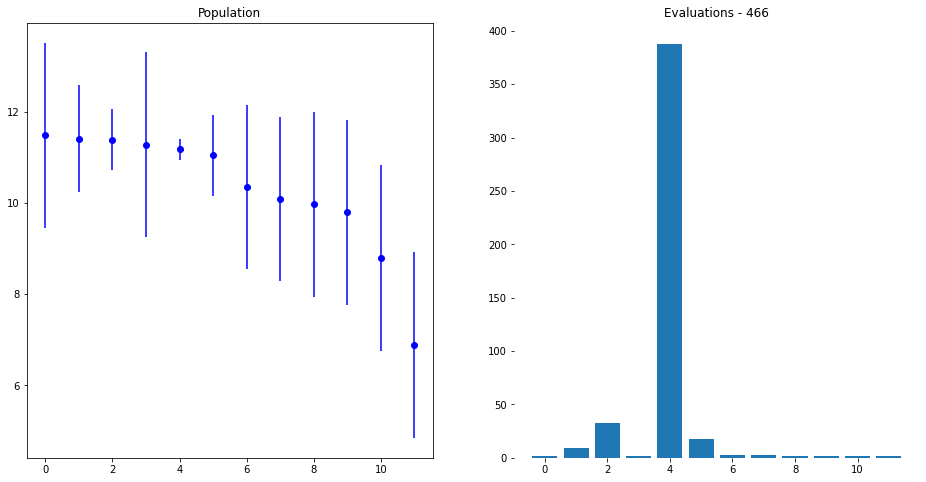

In [35]:
ea.pop.plot()

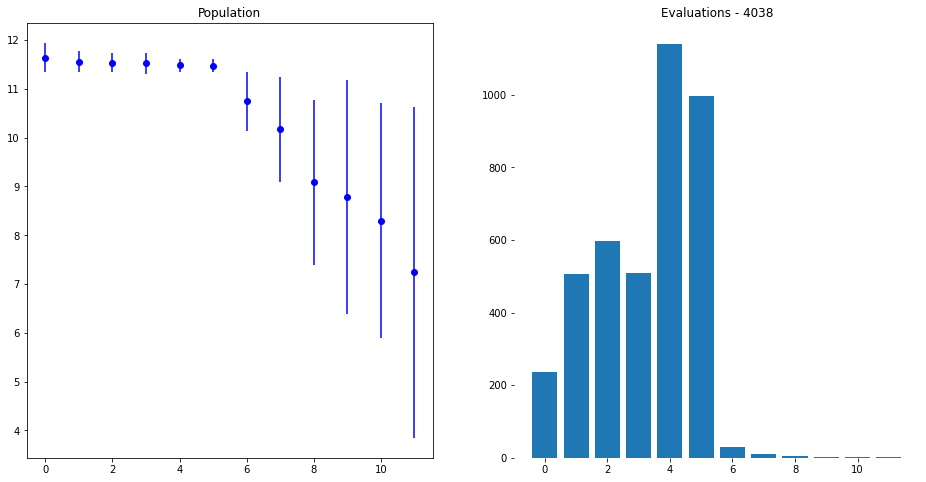

In [36]:
ucea.pop.plot()

In [82]:
pop = Population(args)

pop.random()

real_fit = {i:np.random.random() for i in pop.agents}

for i in pop.agents:
    f = np.random.randn() + real_fit[i]
    pop.add_eval(i, f)

<ipython-input-76-dcbd20bd2042>:37: RuntimeWarning: divide by zero encountered in double_scalars
  np.log(1.25 * n * (t ** 4) / d) / (2.0 * u)


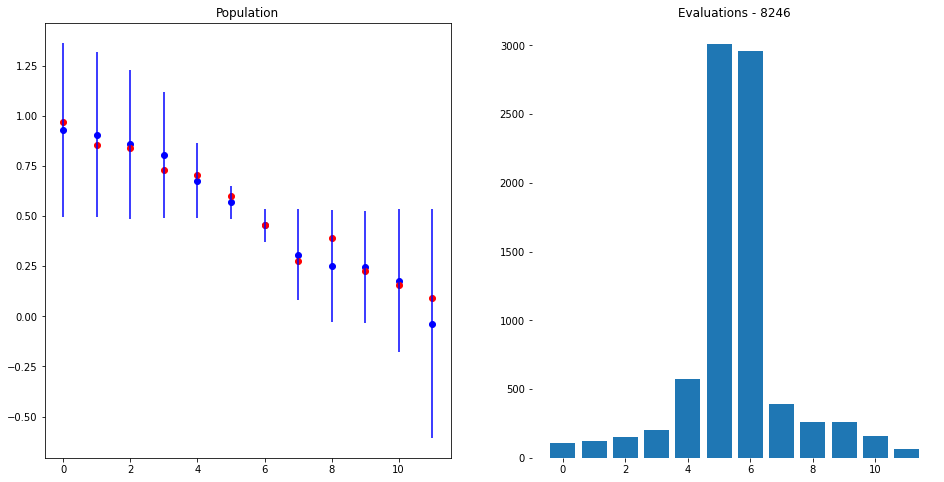

In [74]:
dist = []

for i in range(100000):
    if not i % 500:
        clear_output(True)
        pop.plot(real_fit)
    l, h = pop.get_limits()
    A, B = pop[l[0]], pop[h[0]]
    d = pop.dist(A, B)
    dist.append(np.log10(d))
    if d <= pop.args["epsilon"]:
        #print(f'Reached eps={pop.args["epsilon"]} for {pop.args["n_elites"]} elites after {i*2} evaluations')
        break
    fA = np.random.randn() + real_fit[A]
    pop.add_eval(A, fA)
    fB = np.random.randn() + real_fit[B]
    pop.add_eval(B, fB)

clear_output(True)
pop.plot(real_fit)

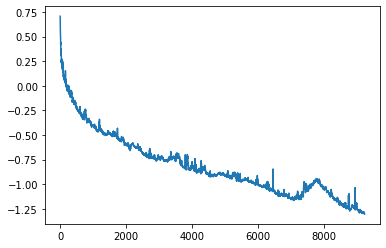

In [209]:
plt.plot(dist)

In [210]:
pop

Population:
 - Ind (10) | 0.97 / 401
 - Ind (10) | 0.86 / 1495
 - Ind (10) | 0.82 / 3422
 - Ind (10) | 0.81 / 3983
 - Ind (10) | 0.72 / 5330
 - Ind (10) | 0.68 / 1848
 - Ind (10) | 0.65 / 1124
 - Ind (10) | 0.54 / 348
 - Ind (10) | 0.5 / 268
 - Ind (10) | 0.45 / 193
 - Ind (10) | -0.0048 / 36
 - Ind (10) | -0.077 / 30

In [212]:
[real_fit[i] for i in pop]

[0.9940158481494493,
 0.8628501288752327,
 0.8265816493709482,
 0.8278026838936753,
 0.7233129247389232,
 0.7049449829647737,
 0.6893623121644109,
 0.6348358906073822,
 0.5093586316811883,
 0.4689329863939551,
 0.06325006185303095,
 0.12910817977043088]

In [95]:
?np.concatenate

In [15]:
5//2

2

In [9]:
from env import *

In [10]:
pb = AllOnes()
pb = Noisy(pb, noise=0.5, max_fit=200, normal=True)

In [11]:
pb = RL("CartPole-v1")
pb = Noisy(pb, noise=0.5, max_fit=200, normal=True)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import numpy as np

In [2]:
def make_data():
    val = 0
    y = []
    n = 0
    evals = []
    for i in range(1000):
        val += abs(np.random.randn())/(i+1)
        n += int(abs(np.random.randn()*10))
        y.append(val)
        evals.append(n)
    return np.array(evals), np.array(y)

In [3]:
from scipy import interpolate

def aggregate(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    F = [interpolate.interp1d(X[i], Y[i]) for i in range(len(X))] # Compute interpolation function
    
    # Compute bounds
    max_evals = min([x[-1] for x in X])
    min_evals = max([x[0] for x in X])
    
    # Create as many points
    n = len(X[0])
    step = (max_evals-min_evals)/n
    new_X = np.arange(min_evals, max_evals, step)
    new_X[-1]=int(new_X[-1])
    
    # Interpolate new X
    try:
        new_Y = [f(new_X) for f in F]
    except:
        for k in range(len(F)):
            f = F[k]
            for x in new_X:
                try:
                    f(x)
                except:
                    print("Failing:", k, x)
        
        
    return new_X, new_Y

In [4]:
results = {}

for a in ["EA", "MultiEA", "UCEA"]:
    X, Y = [], []
    for _ in range(3):
        x, y = make_data()
        X.append(x)
        Y.append(y)
        
    new_X, new_Y = aggregate(X, Y)    
    d = {
        "fitness": Y,
        "gens":np.arange(1000),
        "fitness_evals": new_Y,
        "evals":new_X
    }
    results[a] = d

/home/disc/p.templier/miniconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/disc/p.templier/miniconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


In [5]:
results.keys()

dict_keys(['EA', 'MultiEA', 'UCEA'])

In [6]:
for k, v in results["EA"].items():
    print(f"{k}: {len(v)}")

fitness: 3
gens: 1000
fitness_evals: 3
evals: 1000


In [7]:
for a in ["EA", "MultiEA", "UCEA"]:
    X, Y = [], []
    for _ in range(3):
        evals, fit = make_data()
        X.append(evals)
        Y.append(fit)
        
    new_X, new_Y = aggregate(X, Y)
    generations = [np.arange(len(x)) for x in X]
    cost_gens, cost = aggregate(generations, X)
    d = {
        "fitness": Y,
        "gens":np.arange(len(X[0]))+1,
        "fitness_evals": new_Y,
        "evals":new_X,
        "cost":cost,
        "cost_gens":cost_gens
    }
    results[a] = d

In [8]:
import matplotlib
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


Text(0, 0.5, 'Evaluations')

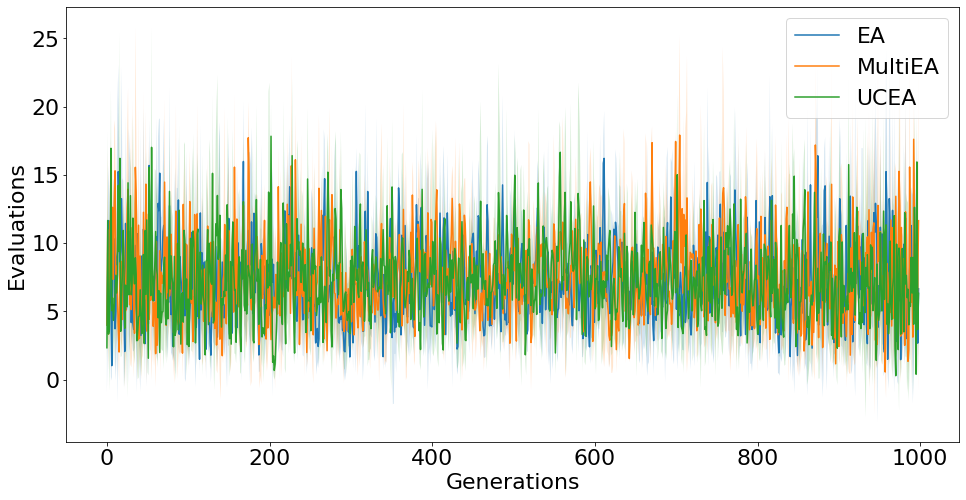

In [11]:
plt.figure(figsize=(16, 8))
for algo, d in results.items():
    diff = [i[1:] - i[:-1] for i in d["cost"]]
    diff = np.array([np.insert(diff[i], 0, d["cost"][i][0]) for i in range(len(diff))])
    
    mean_Y = np.mean(diff, axis=0)    
    std = np.std(diff, axis=0)
    plt.plot(d["cost_gens"], mean_Y, label=algo)
    plt.fill_between(d["cost_gens"], mean_Y-std, mean_Y+std, alpha=0.2)

plt.legend()
plt.xlabel("Generations")
plt.ylabel("Evaluations")

In [39]:
diff = [i[:-1] - i[1:] for i in d["cost"]]
diff = np.array([np.insert(i, 0, 0) for i in diff])


In [40]:
diff.shape

(3, 1000)

In [23]:
diff = mean_Y[:-1] - mean_Y[1:]

In [28]:
diff = np.insert(diff, 0, 0)

In [34]:
diff

array([  0.        , -14.319     ,  -7.99833333, -11.31533333,
        -5.014     ,  -6.985     ,  -5.66766667,  -7.316     ,
        -4.35      ,  -2.01666667,  -8.268     ,  -5.02833333,
        -5.32433333,  -4.999     , -10.911     ,  -9.019     ,
        -5.383     ,  -4.01733333,  -7.924     ,  -8.973     ,
       -10.29766667,  -7.386     ,  -7.326     , -12.86233333,
       -13.63766667,  -5.528     ,  -1.432     , -11.71066667,
       -11.016     ,  -8.39966667, -10.58833333,  -8.072     ,
        -8.96      , -10.28033333,  -4.527     , -12.049     ,
        -9.10766667,  -7.065     ,  -8.917     ,  -5.46733333,
        -5.328     ,  -6.287     ,  -3.77233333, -17.38      ,
       -10.334     , -10.30833333,  -3.963     ,  -4.29833333,
        -7.81966667,  -8.943     , -15.32433333,  -6.79366667,
       -11.699     ,  -8.51566667,  -5.487     ,  -6.273     ,
       -11.36166667,  -4.42533333,  -8.078     ,  -6.12933333,
       -13.20066667, -15.844     , -10.66866667,  -8.13

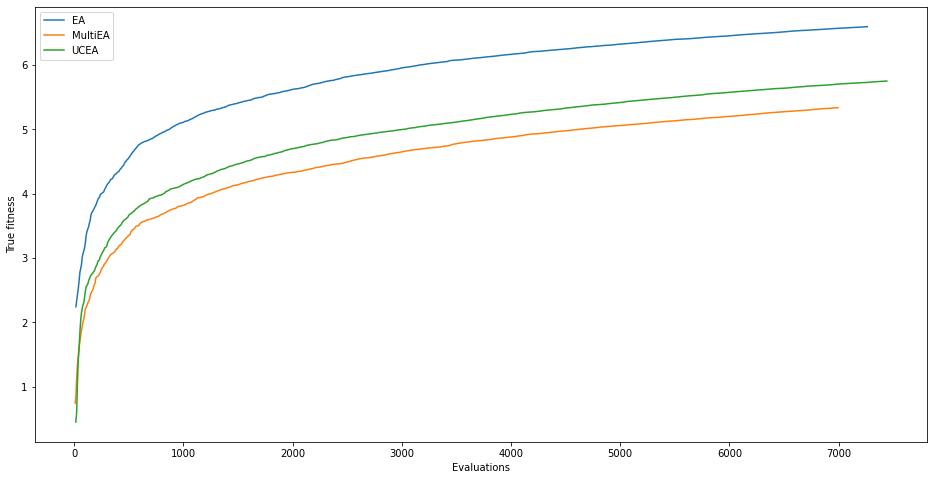

In [109]:
def eval_graph(results, title="", save=None):
    plt.figure(figsize=(16, 8))
    for algo, d in results.items():
        mean_Y = np.mean(d["fitness_evals"], axis=0)
        std = np.std(d["fitness_evals"], axis=0)
        plt.plot(d["evals"], mean_Y, label=algo)
#        plt.fill_between(d["evals"], mean_Y-std, mean_Y+std)
        
    plt.legend()
    plt.xlabel("Evaluations")
    plt.ylabel("True fitness")
    plt.title(title)
    if save:
        plt.savefig(save)
    
eval_graph(results)

In [ ]:
def cost_graph(results, title="", save=None):
    plt.figure(figsize=(16, 8))
    for algo, d in results.items():
        mean_Y = np.mean(d["fitness_evals"], axis=0)
        std = np.std(d["fitness_evals"], axis=0)
        plt.plot(d["evals"], mean_Y, label=algo)
#        plt.fill_between(d["evals"], mean_Y-std, mean_Y+std)
        
    plt.legend()
    plt.xlabel("Evaluations")
    plt.ylabel("True fitness")
    plt.title(title)
    if save:
        plt.savefig(save)
    
cost_graph(results)

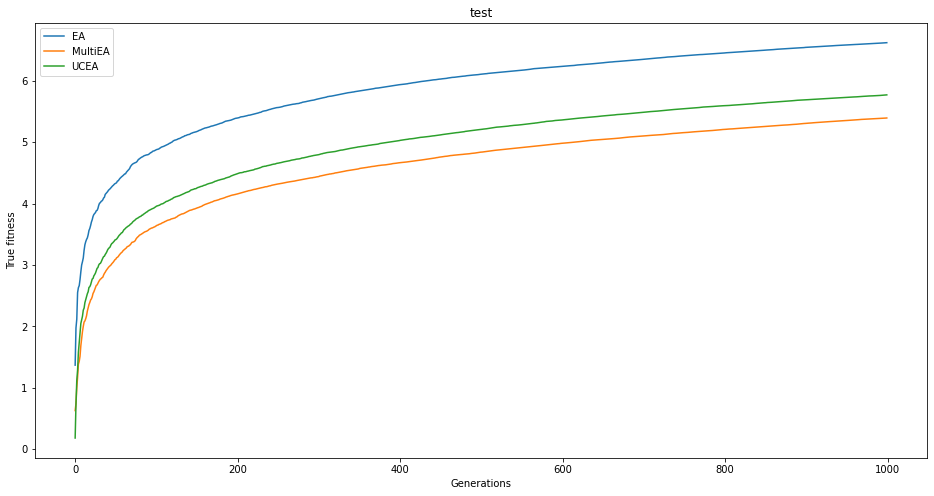

In [112]:
def gen_graph(results, title="", save=None):
    plt.figure(figsize=(16, 8))
    for algo, d in results.items():
        mean_Y = np.mean(d["fitness"], axis=0)
        std = np.std(d["fitness"], axis=0)
        plt.plot(mean_Y, label=algo)
#        plt.fill_between(d["gens"], mean_Y-std, mean_Y+std)
        
    plt.legend()
    plt.xlabel("Generations")
    plt.ylabel("True fitness")
    plt.title(title)
    if save:
        plt.savefig(save)

gen_graph(results, "test")

<ufunc 'floor'>

In [1]:
from run_xp import *

In [2]:
s = "--algos ea"
args = parser.parse_args(s.split())

pb = PROBLEMS[args.problem]()
server = Server(pb)
args.n_genes = pb.n_genes
args.max_fit = pb.max_fit
args.bool_ind = pb.bool_ind
    
cfg = args.__dict__

In [3]:
ea = EA(cfg, server)


Saving to ./genomes/all_ones_EA_2022-01-17_13-30-56-210614

In [12]:
import gym
from run_xp import *
# env_name = "CartPole-v0"
env = make_env("bigfish")
# Add a wrapper to save the render
env = gym.wrappers.Monitor(env, "./videos/breakout", force=True)
env

/home/disc/p.templier/miniconda3/lib/python3.8/site-packages/gym/logger.py:34: UserWarning: WARN: Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


<Monitor<TorchTransposeWrapper<gym3.interop.ToGymEnv object at 0x7fa9ef1447f0>>>

In [13]:
# Play the game and save the images
done = False
obs = env.reset()
for i in range(100):
    if done:
        obs = env.reset()
    env.render("human")
    # random action
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
env.close()


/home/disc/p.templier/miniconda3/lib/python3.8/site-packages/gym/logger.py:34: UserWarning: WARN: Env returned None on render(). Disabling further rendering for video recorder by marking as disabled: path=/home/disc/p.templier/Documents/Doctorat/Dev/pyUCEA/videos/breakout/openaigym.video.4.27704.video000000.mp4 metadata_path=/home/disc/p.templier/Documents/Doctorat/Dev/pyUCEA/videos/breakout/openaigym.video.4.27704.video000000.meta.json
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [9]:
env.close()

In [11]:
import cv2
import gym
from run_xp import *
import numpy as np
import seaborn as sns
import matplotlib.colors as colors

%matplotlib inline
# env_name = "CartPole-v0"
# env_name = "min-breakout"
env_name = "bigfish"

env = make_env(env_name)
shape = env.reset().shape
shape

(3, 64, 64)

In [12]:
obs = env.reset()
images = []
done = False
for i in range(1000):
    if done:
        obs = env.reset()
    # images.append(env.render("rgb_array"))
    images.append(obs)
    # env.render("human")
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
env.close()
images = np.array(images)
images.shape

(1000, 3, 64, 64)

In [16]:
# make video with cv2 from images
import cv2
import numpy as np

height = 64
width = 64
scaling = 1
# water_depth = np.zeros((height, width), dtype=float)

# initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID') # for mp4
fps = 30
video_filename = 'videos/output.mp4'
out = cv2.VideoWriter(video_filename, fourcc, fps, (width*scaling, height*scaling))

for i in range(len(images)):
    image = images[i]
    image = np.transpose(image, (1, 2, 0))
    image = cv2.resize(image, (width*scaling, height*scaling), interpolation = cv2.INTER_NEAREST)
    # print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    out.write(image)
    # cv2.imshow('frame', image)


In [ ]:
env.render("rgb_array")

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
  

In [15]:
cv2.destroyAllWindows()

In [20]:
from torch.nn.init import xavier_uniform_
import torch
g = np.random.random(10)
g

array([0.05968771, 0.47870765, 0.45847536, 0.35475906, 0.48205828,
       0.38794328, 0.82913019, 0.9168935 , 0.42898937, 0.61424594])

In [21]:
xavier_uniform_(torch.tensor(g))

ValueError: Fan in and fan out can not be computed for tensor with fewer than 2 dimensions